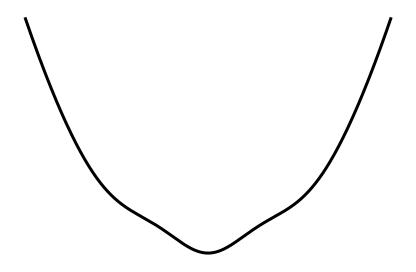

In [217]:
import numpy as np
from matplotlib import rc
from scipy.special import factorial
import matplotlib.pyplot as plt
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
rc('text', usetex=True)

# PLOT_PROB=False plots the wavefunction, psi; PLOT_PROB=True plots |psi|^2
PLOT_PROB = False

# Maximum vibrational quantum number to calculate wavefunction for
VMAX = 1

# Some appearance settings
# Pad the q-axis on each side of the maximum turning points by this fraction
QPAD_FRAC = 1.3
# Scale the wavefunctions by this much so they don't overlap
SCALING = 0.7
# Colours of the positive and negative parts of the wavefunction
COLOUR1 = "C0"#(0.6196, 0.0039, 0.2588, 1.0)
COLOUR2 = "blue"#(0.3686, 0.3098, 0.6353, 1.0)

# Normalization constant and energy for vibrational state v
N = lambda v: 1./np.sqrt(np.sqrt(np.pi)*2**v*factorial(v))
get_E = lambda v: v + 0.5

def make_Hr():
    """Return a list of np.poly1d objects representing Hermite polynomials."""

    # Define the Hermite polynomials up to order VMAX by recursion:
    # H_[v] = 2qH_[v-1] - 2(v-1)H_[v-2]
    Hr = [None] * (VMAX + 1)
    Hr[0] = np.poly1d([1.,])
    Hr[1] = np.poly1d([2., 0.])
    for v in range(2, VMAX+1):
        Hr[v] = Hr[1]*Hr[v-1] - 2*(v-1)*Hr[v-2]
    return Hr

Hr = make_Hr()

def get_psi(v, q):
    """Return the harmonic oscillator wavefunction for level v on grid q."""
    return N(v)*Hr[v](q)*np.exp(-q*q/2.)

def get_turning_points(v):
    """Return the classical turning points for state v."""
    qmax = np.sqrt(2. * get_E(v + 0.5))
    return -qmax, qmax

def get_potential(q):
    """Return potential energy on scaled oscillator displacement grid q."""
    return q**2 / 2


fig, ax = plt.subplots()
qmin, qmax = get_turning_points(VMAX)
xmin, xmax = QPAD_FRAC * qmin, QPAD_FRAC * qmax
q = np.linspace(qmin-1, qmax+1, 500)
V = get_potential(q)

def plot_func(ax, f, scaling=1, yoffset=0, color=None):
    """Plot f*scaling with offset yoffset.

    The curve above the offset is filled with COLOUR1; the curve below is
    filled with COLOUR2.

    """
    if color is None:
        color = COLOUR1
    ax.plot(q, f*scaling + yoffset, color="k", lw=3)
#     ax.fill_between(q, f*scaling + yoffset, yoffset, f > 0.,
#                     color=COLOUR1, alpha=0.5)
#     ax.fill_between(q, f*scaling + yoffset, yoffset, f < 0.,
#                     color=COLOUR2, alpha=0.5)

# Plot the potential, V(q).
# ax.plot(q, V, color='k', linewidth=1.5)

# Plot each of the wavefunctions (or probability distributions) up to VMAX.
for v in range(1):#VMAX+1):
    psi_v = get_psi(0, q)
    psi_v2 = get_psi(1, q)
    E_v = get_E(v)
    if PLOT_PROB:
#         plot_func(ax, (psi_v )**2, scaling=SCALING*5, yoffset=E_v)
#         α0 = 0.7
        plot_func(ax, np.abs(np.sqrt(α0) * psi_v + np.sqrt(1-α0) * np.exp(1j*np.pi/2) * psi_v2)**2, scaling=SCALING*5, yoffset=E_v)
#         α0 = 0.3 
#         plot_func(ax, np.abs(np.sqrt(α0) * psi_v + np.sqrt(1-α0) * np.exp(1j*np.pi/2) * psi_v2)**2, color="C3", scaling=SCALING*5, yoffset=E_v)
#         plot_func(ax, psi_v2, scaling=SCALING*4, yoffset=E_v)
    else:
        plot_func(ax, V + np.abs(psi_v + np.exp(1j*np.pi/2) * psi_v2)**2, scaling=4, yoffset=E_v)
    # The energy, E = (v+0.5).hbar.omega.
#     ax.text(s=r'$\frac{{{}}}{{2}}\hbar\omega$'.format(2*v+1), x=qmax+0.2,
#             y=E_v, va='center')
#     # Label the vibrational levels.
#     ax.text(s=r'$v={}$'.format(v), x=qmin-0.2, y=E_v, va='center', ha='right')

# The top of the plot, plus a bit.
ymax = E_v+0.5

if PLOT_PROB:
    ylabel = r'$|\psi(q)|^2$'
else:
    ylabel = r'$\psi(q)$'
# ax.text(s=ylabel, x=0, y=ymax, va='bottom', ha='center')

ax.set_xlabel('$q$')
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(0, ymax)
ax.spines['left'].set_position('center')
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axis("off")

plt.savefig('sho-psi{}-{}.png'.format(PLOT_PROB+1, VMAX))
plt.tight_layout()
plt.savefig("/Users/josephbroz/Desktop/nlqm/oscillator1.pdf")
plt.show()

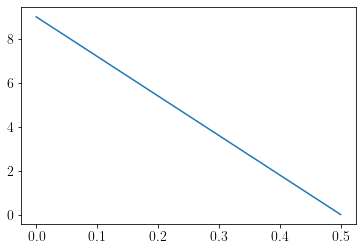

In [178]:
x = np.linspace(0, 0.5, 1000)
nl = lambda x: 10 * x**2 + (1-x)**2
# plt.plot(x, nl(x))
def contrast(x):
    return 1 - 2 * np.abs(x - 0.5)
# plt.plot(x, contrast(x) * (10 * x**2 + (1-x)**2))
# plt.plot(x, contrast(x))
plt.plot(x, nl(1-x) - nl(x))

In [179]:
nl(0.7) - nl(0.3) 

3.5999999999999996

In [258]:
np.abs(get_psi(0,Q))**2

array([6.96265260e-05, 9.87534741e-05, 1.39099171e-04, 1.94576865e-04,
       2.70303932e-04, 3.72913432e-04, 5.10926222e-04, 6.95188949e-04,
       9.39381556e-04, 1.26059535e-03, 1.67997908e-03, 2.22344580e-03,
       2.92242736e-03, 3.81465620e-03, 4.94494634e-03, 6.36593597e-03,
       8.13874516e-03, 1.03334927e-02, 1.30296072e-02, 1.63158616e-02,
       2.02900541e-02, 2.50582593e-02, 3.07335759e-02, 3.74343064e-02,
       4.52815193e-02, 5.43959656e-02, 6.48943510e-02, 7.68849963e-02,
       9.04629622e-02, 1.05704752e-01, 1.22662757e-01, 1.41359641e-01,
       1.61782912e-01, 1.83879945e-01, 2.07553749e-01, 2.32659774e-01,
       2.59004030e-01, 2.86342786e-01, 3.14384025e-01, 3.42790831e-01,
       3.71186716e-01, 3.99162888e-01, 4.26287295e-01, 4.52115215e-01,
       4.76201061e-01, 4.98110959e-01, 5.17435638e-01, 5.33803084e-01,
       5.46890428e-01, 5.56434523e-01, 5.62240744e-01, 5.64189584e-01,
       5.62240744e-01, 5.56434523e-01, 5.46890428e-01, 5.33803084e-01,
      

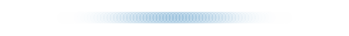

In [255]:
fig, ax = plt.subplots()
circles = []
Q = np.linspace(-3, 3, 103)
for q in Q:
    ψ = np.abs(get_psi(0, q))**2
    circle = plt.Circle((q, 0), 0.1, color="C0", lw=1, alpha=ψ/5)
    ax.add_patch(circle)
# ax.plot(Q, 0.4 * Q**2 - 1, color="k")
plt.axis("off")
plt.xlim(Q[0], Q[-1])
plt.ylim(-0.2, 0.2)
plt.gca().set_aspect(1)
plt.show()

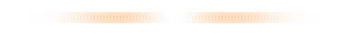

In [256]:
fig, ax = plt.subplots()
circles = []
for q in Q:
    ψ = np.abs(get_psi(1, q))**2
    circle = plt.Circle((q, 0), 0.1, color="C1", lw=1, alpha=ψ/5)
    ax.add_patch(circle)
plt.axis("off")
plt.xlim(Q[0], Q[-1])
plt.ylim(-0.2, 0.2)
plt.gca().set_aspect(1)
plt.show()

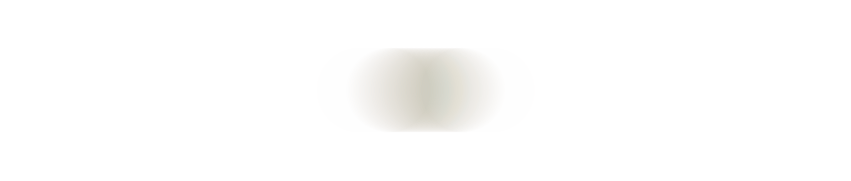

In [215]:
fig, ax = plt.subplots(figsize=(15,10))
circles = []
p = 0.7
for i, q in enumerate(Q):
    color = "C0" if i%2 == 0 else "C1"
    ψ = np.abs(np.sqrt(p) * get_psi(0, q) + np.sqrt(1-p) * np.exp(1j*np.pi/2) * get_psi(1, q))**2
    circle = plt.Circle((q, 0), 1, color=color, lw=1, alpha=ψ/50)
    ax.add_patch(circle)
plt.axis("off")
plt.xlim(-10, 10)
plt.ylim(-2, 2)
plt.gca().set_aspect("equal")
plt.show()

In [176]:
help(plt.Circle)

Help on class Circle in module matplotlib.patches:

class Circle(Ellipse)
 |  Circle(xy, radius=5, **kwargs)
 |  
 |  A circle patch.
 |  
 |  Method resolution order:
 |      Circle
 |      Ellipse
 |      Patch
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, xy, radius=5, **kwargs)
 |      Create true circle at center *xy* = (*x*, *y*) with given
 |      *radius*.  Unlike :class:`~matplotlib.patches.CirclePolygon`
 |      which is a polygonal approximation, this uses Bezier splines
 |      and is much closer to a scale-free circle.
 |      
 |      Valid kwargs are:
 |        agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
 |        alpha: float or None
 |        animated: bool
 |        antialiased or aa: unknown
 |        capstyle: {'butt', 'round', 'projecting'}
 |        clip_box: `.Bbox`
 |        clip_on: bool
 |        clip_path: [(`~matplotlib.path